# Task 6 : Prediction Using Decision Tree Algorithm


# Name : Divyansh Kogta

<br>

## Problem Statement

* <b>Create the Decision Tree classifier and visualize it graphically. </b>

* <b>The purpose is if we feed any new data to this classifier, it would be able to
   predict the right class accordingly. </b>



In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Shape
df.shape

(150, 6)

In [4]:
# Check if there is any missing value
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Description
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
# Dropping Id column, as it is unnecessary
df.drop(['Id'], axis = 1, inplace = True)

In [8]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### EDA

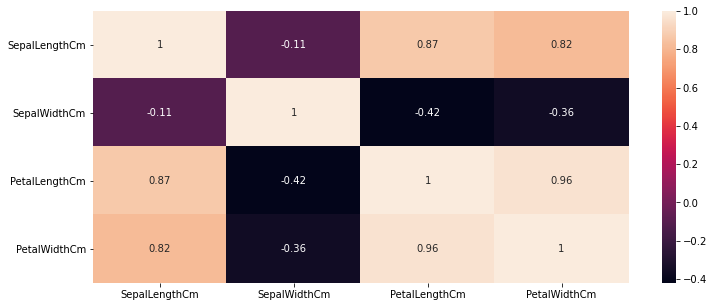

In [9]:
# Heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Univariate Analysis

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


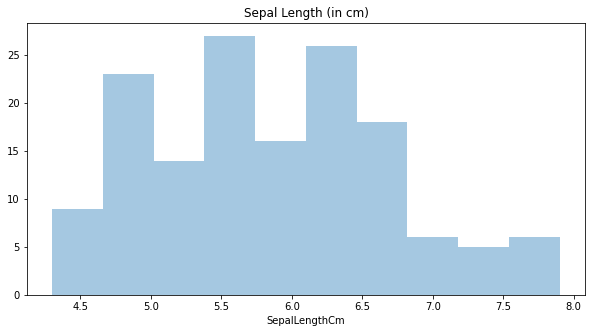

In [10]:
# SepalLengthCm
plt.figure(figsize=(10, 5))
sns.distplot(df['SepalLengthCm'],kde=False, bins=10)
plt.title('Sepal Length (in cm)')
plt.show()

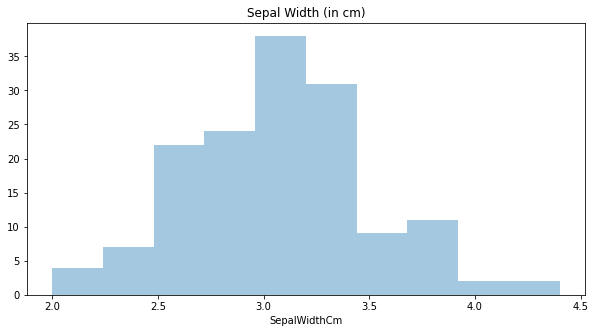

In [11]:
# SepalWidthCm
plt.figure(figsize=(10, 5))
sns.distplot(df['SepalWidthCm'], kde=False, bins=10)
plt.title('Sepal Width (in cm)')
plt.show()

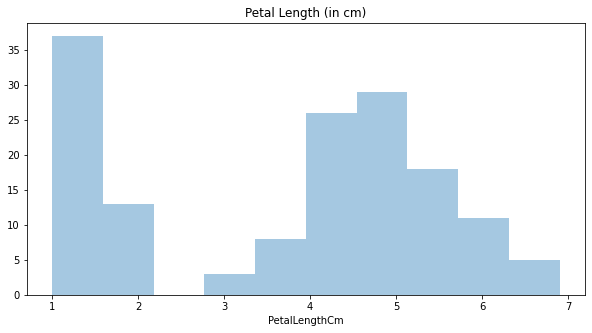

In [12]:
# PetalLengthCm
plt.figure(figsize=(10, 5))
sns.distplot(df['PetalLengthCm'], kde=False, bins=10)
plt.title('Petal Length (in cm)')
plt.show()

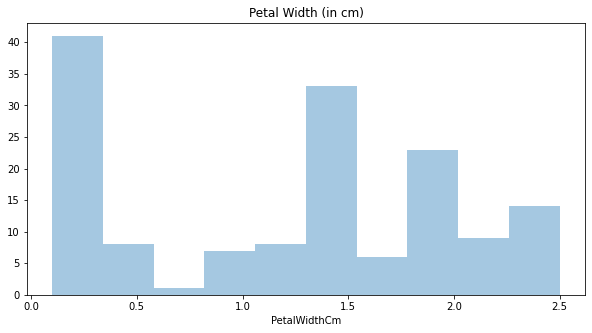

In [13]:
# PetalWidthCm
plt.figure(figsize=(10, 5))
sns.distplot(df['PetalWidthCm'], kde=False, bins=10)
plt.title('Petal Width (in cm)')
plt.show()

### Multivariate Analysis

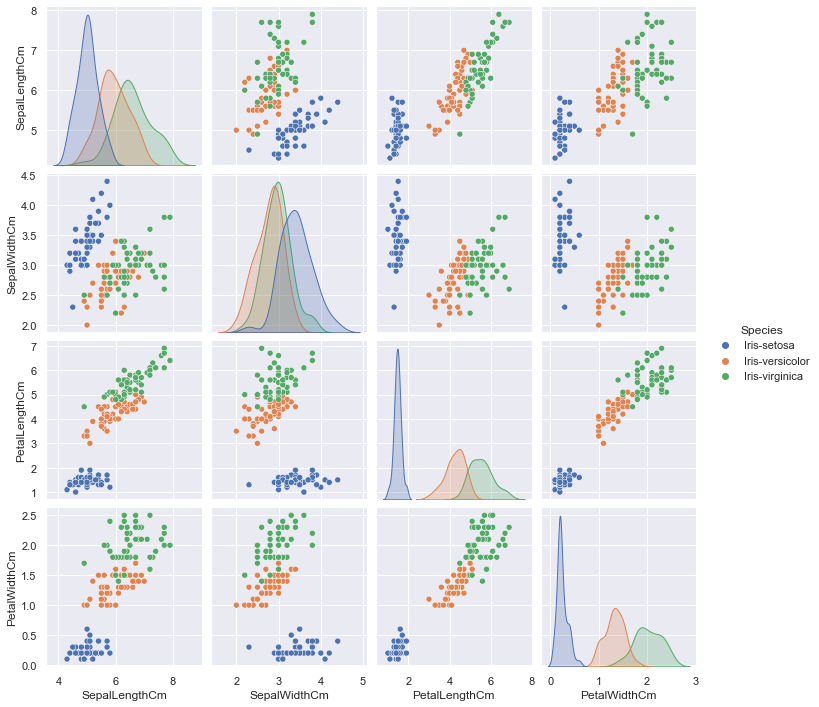

In [14]:
sns.set()
sns.pairplot(df, hue="Species", diag_kind="kde")

### Feature Engineering

In [15]:
# Dividing into dependent variable and independent variable
X = df.drop(['Species'], axis = 1)
y = df['Species']

In [16]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [18]:
X.shape

(150, 4)

In [19]:
y.shape

(150,)

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1) 

### Training the model

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# Prediction
model.predict(X_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Visualising the Decision Tree Classifier

In [23]:
# Import necessary libraries for graph viz
from six import StringIO    
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

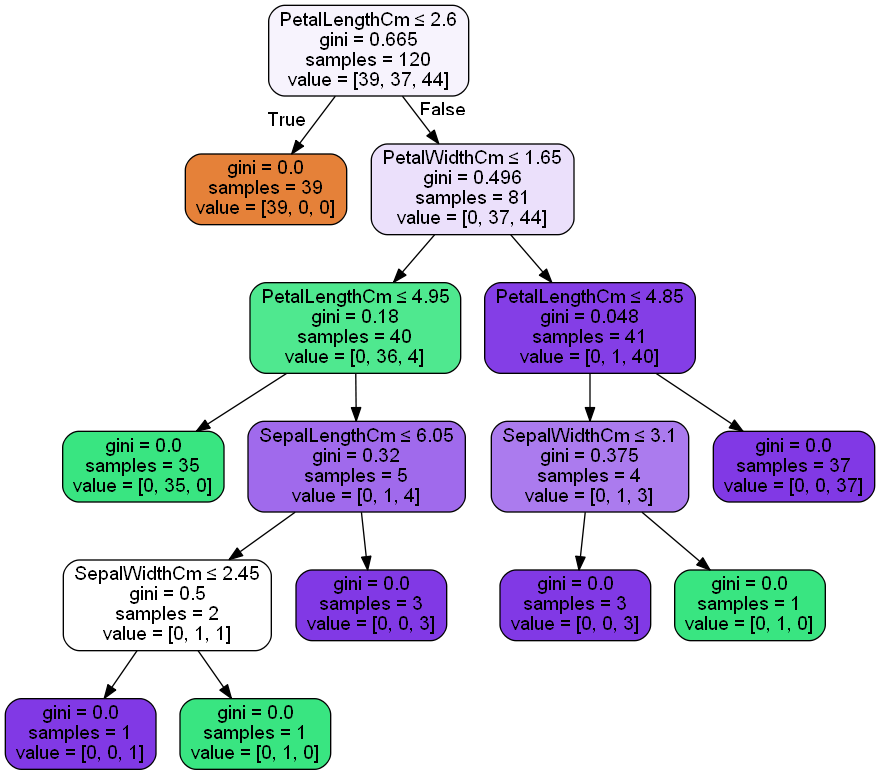

In [28]:
# Visualize the graph

# Text I/O implementation
dot_data = StringIO()

features = X.columns

# Export tree
export_graphviz(model, out_file=dot_data, feature_names=features, filled=True,
               rounded=True, special_characters=True)

# Load graph as defined by data in DOT format
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save Image
graph.write_png('dtree.png')

# Create Image
Image(graph.create_png())

In [33]:
# The rules of this tree can be explicitly understood
from sklearn.tree.export import export_text
flow_chart = export_text(model, feature_names = ('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'))
print(flow_chart)

|--- PetalLengthCm <= 2.60
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.60
|   |--- PetalWidthCm <= 1.65
|   |   |--- PetalLengthCm <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  4.95
|   |   |   |--- SepalLengthCm <= 6.05
|   |   |   |   |--- SepalWidthCm <= 2.45
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- SepalWidthCm >  2.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- SepalLengthCm >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- PetalWidthCm >  1.65
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- SepalWidthCm <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- SepalWidthCm >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: Iris-virginica



### Model Evaluation

In [41]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

In [48]:
# Making Predictions
y_pred = model.predict(X_test)

# Accuracy
print('Acuracy Score :\n', accuracy_score(y_test, y_pred))

# Confusion Matrix
print('\n Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))


# Classification report
print('\n Classification Report :')
print(classification_report(y_test, y_pred))



Acuracy Score :
 0.9666666666666667

 Confusion Matrix :
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

 Classification Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Prediction on Random values from dataset

In [39]:
model.predict([[5.0,3.4,1.5,0.2]])

array(['Iris-setosa'], dtype=object)

In [38]:
model.predict([[6.5,3.0,5.5,2.1]])

array(['Iris-virginica'], dtype=object)

In [37]:
model.predict([[6.7,3.1,4.4,1.4]])

array(['Iris-versicolor'], dtype=object)

#### Model has predicted all Species correctly

## Conclusion

#### 1. Our Decision Tree classifier has an accuracy of 96.66%.
#### 2. Our classifier is a perfect classifier as it has a precison and recall both equal to 1.
#### 3. If we feed any new data to this classifier, it would be able to predict the right class accordingly.